## 3.2.2 밀도 기반 군집 분석 (DBSCN)
Density-Based Spatial Clustering of Applications with Noise
\n밀도 기반 군집 분석!

## 3.2.3 주성분 분석 (PCA)
Principal Component Analysis 주성분 분석
데이터들의 분포 특성을 잘 설명하는 데이터를 추출하여 간소화

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [3]:
X = pd.read_csv('./data/credit card.csv')
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
X.drop('CUST_ID', axis=1, inplace=True)
X.fillna(method='ffill', inplace=True)
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

C:\Users\HANSUNG\AppData\Local\Temp\ipykernel_26224\2617556028.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [7]:
# 데이터 전처리 및 차원 축소 진행
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


In [8]:
db_default = DBSCAN(eps =0.0375, min_samples=3).fit(X_principal) # 모델 생성 및 훈련
labels = db_default.labels_ # 각 데이터 포인트에 할당된 모든 클러스터 레이ㅍ블의 넘파일 배열을 저장

In [9]:
colours = {}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]
cvec

['y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'g',
 'k',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'k',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y'

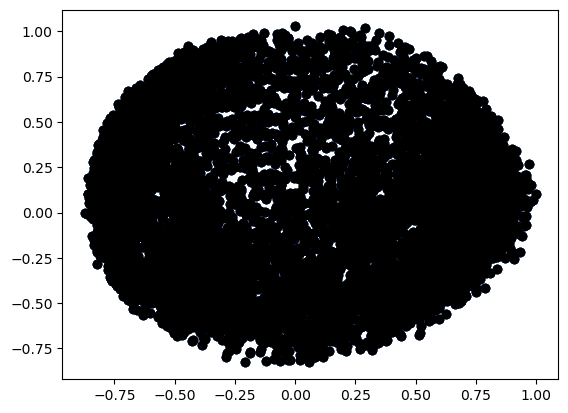

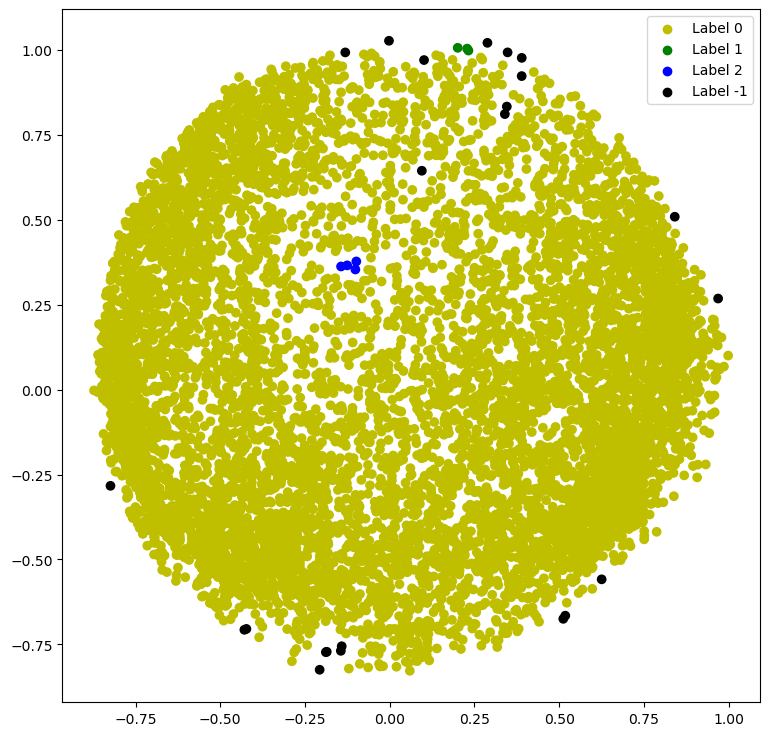

In [10]:
r =plt.scatter(X_principal['P1'], X_principal['P2'], color='y')
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g')
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b')
k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k')

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r,g,b,k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

In [33]:
# 모델 튜닝
db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r','g','b','c','y','m','k']


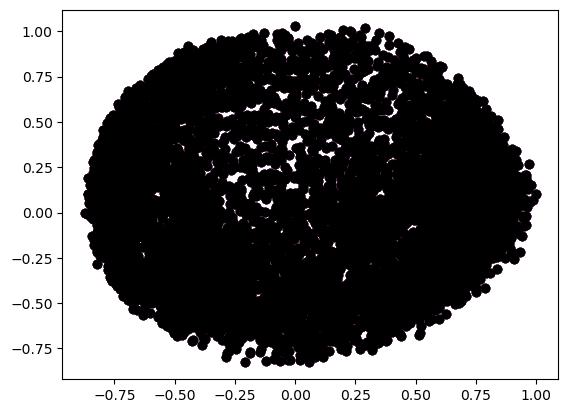

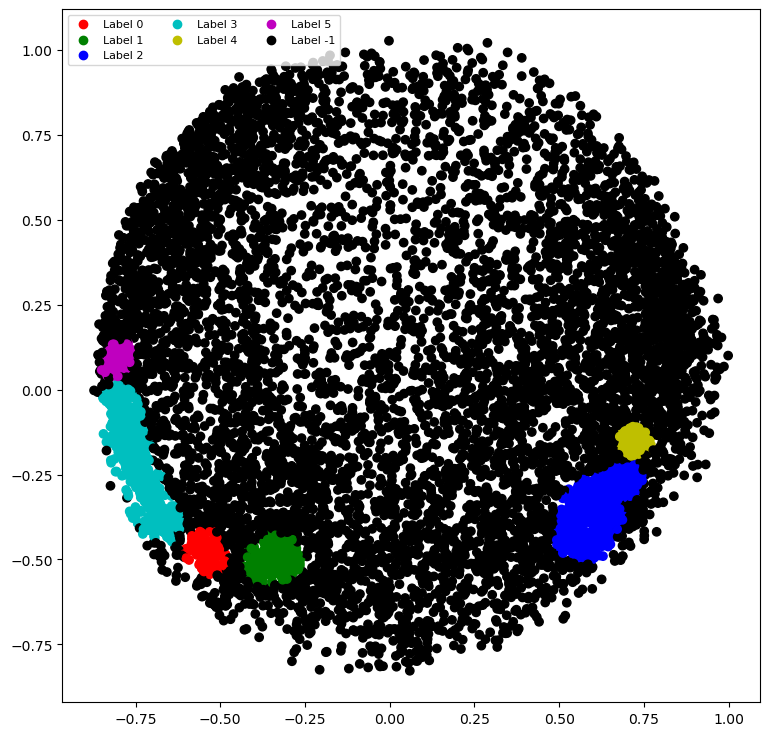

In [34]:
r = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[0])
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[1])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[3])
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[4])
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[5])
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[6])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r,g,b,c,y,m,k),
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'),
           scatterpoints = 1,
           loc='upper left',
           ncol=3,
           fontsize=8)
plt.show()